In [2]:
import pandas as pd
import os

In [107]:

#data_clean = pd.read_csv("Dataset_Clean_1106.csv")
data_clean = pd.read_csv("data_clean_divide.csv")

In [117]:
data_no_correlation=data_clean.drop(['date_review_to_now','useful_user', 'funny_user', 'cool_user','compliment_profile', 'compliment_note',
                            'compliment_hot','compliment_more', 'compliment_list', 'compliment_cool', 'compliment_funny',
                            'compliment_plain','friends_number', 'compliment_writer','compliment_cute','useful_review','fans','funny_review','cool_review','elite_years'],axis=1)
len(data_no_correlation.columns)

30

In [118]:
from sklearn import preprocessing
normalize_list = []
for i in data_no_correlation.columns:
    if any(data_no_correlation[i]>1):
        normalize_list.append(i)
for feature in normalize_list:
    data_no_correlation[feature] = preprocessing.scale((data_no_correlation[feature]))
data_no_correlation

C:\Users\zhang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,stars_review,is_open,review_count_business,stars_business,attributes.RestaurantsPriceRange2,review_count_user,average_stars_user,compliment_photos,since_first_review,text_length,...,Vietnamese,count_food_detail,count_food_quality,Useful,operatinghours,price_cost,traffic,queue_in_line,service,ambience
0,0.204022,1,-0.356503,0.374255,0.244153,-0.351763,0.295058,-0.212872,0.893876,-0.451166,...,0,-0.447424,-0.224774,0,2.412133e-14,-0.196471,-0.063423,-0.416640,0.797582,-0.300865
1,0.204022,1,-0.356503,0.374255,0.244153,-0.205328,-0.596140,-0.211770,0.177164,0.770242,...,0,-0.447424,-0.224774,0,2.412133e-14,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865
2,0.966639,0,-0.477106,0.374255,1.740155,-0.205328,-0.596140,-0.211770,-0.851394,-0.022374,...,0,-0.703726,-0.224774,0,-1.240761e+00,-0.196471,-0.063423,-0.416640,0.797582,-0.300865
3,0.204022,1,-0.356503,0.374255,0.244153,-0.061881,0.505706,0.150762,1.578696,0.893682,...,0,0.834088,1.652425,0,2.412133e-14,-0.196471,-0.063423,-0.416640,2.084959,-0.300865
4,0.204022,1,-0.146018,0.374255,-1.251848,-0.061881,0.505706,0.150762,1.658429,1.276997,...,0,0.065181,-0.224774,0,4.016638e-01,-0.196471,-0.063423,-0.416640,-0.489796,2.232244
5,0.204022,1,0.005304,-0.460853,0.244153,-0.061881,0.505706,0.150762,-0.848736,1.147060,...,0,1.090390,-0.224774,1,3.955433e-02,-0.196471,-0.063423,1.315289,3.372337,-0.300865
6,0.204022,1,-0.428182,1.209364,0.244153,-0.061881,0.505706,0.150762,-1.121601,2.043625,...,0,2.115599,1.652425,1,6.603134e-01,-0.196471,-0.063423,-0.416640,3.372337,-0.300865
7,0.204022,1,0.191897,0.374255,0.244153,-0.061881,0.505706,0.150762,-0.144427,1.296487,...,0,1.346692,3.529624,1,-7.363945e-01,-0.196471,-0.063423,1.315289,2.084959,-0.300865
8,0.966639,1,-0.134640,1.209364,-1.251848,-0.061881,0.505706,0.150762,-1.184502,2.186556,...,0,0.834088,9.161221,1,-9.303817e-01,4.230238,-0.063423,-0.416640,3.372337,-0.300865
9,0.204022,1,1.122584,1.209364,0.244153,-0.061881,0.505706,0.150762,0.799083,2.147575,...,0,0.834088,1.652425,1,-2.288292e+00,-0.196471,-0.063423,-0.416640,-0.489796,-0.300865


In [119]:
from sklearn import cross_validation
#train-test split
train, test = cross_validation.train_test_split(data_no_correlation, test_size=0.2)

In [120]:
from sklearn import tree
from sklearn.metrics import roc_auc_score
auc_list = []
importance_list = []
y = train['Useful']
x = train.drop('Useful', axis = 1)
x.columns

Index(['stars_review', 'is_open', 'review_count_business', 'stars_business',
       'attributes.RestaurantsPriceRange2', 'review_count_user',
       'average_stars_user', 'compliment_photos', 'since_first_review',
       'text_length', 'text_positive', 'text_negative', 'user_yelping_to_now',
       'Chinese', 'Mexican', 'American', 'Korean', 'Italian', 'Japanese',
       'Thai', 'Vietnamese', 'count_food_detail', 'count_food_quality',
       'operatinghours', 'price_cost', 'traffic', 'queue_in_line', 'service',
       'ambience'],
      dtype='object')

In [121]:
y_t = test['Useful']
x_t = test.drop('Useful', axis = 1)

In [122]:
kf = cross_validation.KFold(len(train), n_folds = 10, shuffle=False)
for train_idx, validation_idx in kf:
    x_train = x.iloc[train_idx]
    
    y_train = y.iloc[train_idx]
    x_validation = x.iloc[validation_idx]
    y_validation = y.iloc[validation_idx]
    clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=200, 
                                            min_samples_leaf=200)
    clf.fit(x_train, y_train)
    clf_pred = clf.predict_proba(x_t)[:,1]
    auc = roc_auc_score(y_t, clf_pred)
    auc_list.append(auc)
    importance = clf.feature_importances_
    importance_list.append(importance)

In [123]:
auc_list

[0.8586460231017834,
 0.86089209795028454,
 0.86022681715450267,
 0.86024683325717666,
 0.86081354046320635,
 0.86118016978310941,
 0.86100676964130474,
 0.86123821232383335,
 0.86459596031399211,
 0.8582384782075152]

In [63]:
dic={}
for (a,b) in zip (x.columns, importance_list[0]):
    print(a, b)
    dic[a]=b
sorted(dic, key=dic.get)

stars_review 0.0208044307611
is_open 0.0
review_count_business 0.00229809102001
stars_business 0.00105842647408
attributes.RestaurantsPriceRange2 0.000462423520579
review_count_user 0.0111162930158
average_stars_user 0.00201390739593
compliment_photos 0.777893063382
since_first_review 0.0142273422984
date_review_to_now 0.0175384445991
text_length 0.145355443487
text_positive 0.0
text_negative 0.000951958089461
user_yelping_to_now 0.00435484131918
Chinese 0.0
Mexican 0.0
American 0.000139621031061
Korean 0.0
Italian 0.000333362831339
Japanese 0.000379718167901
Thai 0.0
Vietnamese 0.0
count_food_detail 0.000158554310784
count_food_quality 0.0
operatinghours 0.00091407829636
price_cost 0.0
traffic 0.0
queue_in_line 0.0
service 0.0
ambience 0.0


['is_open',
 'text_positive',
 'Chinese',
 'Mexican',
 'Korean',
 'Thai',
 'Vietnamese',
 'count_food_quality',
 'price_cost',
 'traffic',
 'queue_in_line',
 'service',
 'ambience',
 'American',
 'count_food_detail',
 'Italian',
 'Japanese',
 'attributes.RestaurantsPriceRange2',
 'operatinghours',
 'text_negative',
 'stars_business',
 'average_stars_user',
 'review_count_business',
 'user_yelping_to_now',
 'review_count_user',
 'since_first_review',
 'date_review_to_now',
 'stars_review',
 'text_length',
 'compliment_photos']

In [124]:
min_samples_split_values = [100,150,200,300,400,500,1000,1500,2000,3000]
min_samples_leaf_values = [30,50,100,150,200,300,500,600,800,1000]

In [17]:
import numpy as np

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score
scores=np.zeros((10,10), dtype=float)

for i in range(len(min_samples_split_values)):
    for j in range(len(min_samples_leaf_values)):
        split=min_samples_split_values[i]
        leaf=min_samples_leaf_values[j]
        models = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=split, 
                                            min_samples_leaf=leaf)
        churnfits=models.fit(x,y)
        test_predict = models.predict(x_t)
        scores[j][i]=accuracy_score(y_t, test_predict)
        
print(scores)

[[ 0.85165963  0.85178033  0.85214243  0.85087508  0.84834037  0.84791792
   0.84520217  0.84477972  0.84133977  0.83904647]
 [ 0.84996982  0.85184068  0.85129753  0.85045263  0.84852142  0.84882317
   0.84520217  0.84477972  0.84133977  0.83904647]
 [ 0.84996982  0.84996982  0.84996982  0.84809897  0.84701267  0.84707302
   0.84477972  0.84477972  0.84133977  0.83904647]
 [ 0.84749547  0.84749547  0.84749547  0.84749547  0.84659022  0.84592637
   0.84459867  0.84357272  0.84140012  0.83892577]
 [ 0.84538322  0.84538322  0.84538322  0.84538322  0.84538322  0.84562462
   0.84417622  0.84333132  0.84115872  0.83554617]
 [ 0.84327097  0.84327097  0.84327097  0.84327097  0.84327097  0.84327097
   0.84369342  0.84140012  0.84067592  0.83554617]
 [ 0.83729632  0.83729632  0.83729632  0.83729632  0.83729632  0.83729632
   0.83729632  0.83578757  0.83602897  0.83602897]
 [ 0.83494267  0.83494267  0.83494267  0.83494267  0.83494267  0.83494267
   0.83494267  0.83494267  0.83572722  0.83572722]


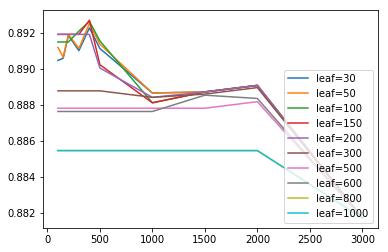

In [22]:

for i in  range(10):
    plt.plot(min_samples_split_values, scores[i])
plt.legend(['leaf=30', 'leaf=50','leaf=100', 'leaf=150','leaf=200','leaf=300','leaf=500','leaf=600','leaf=800','leaf=1000'], loc='lower right')

plt.show()

In [23]:
# Code here
print(scores.max())
scores.argmax()

0.892697646349


34

In [33]:
data_no_correlation=data_clean.drop(['text_positive','compliment_photos','count_food_detail','date_review_to_now','price_cost','ambience','service','queue_in_line','traffic','operatinghours','count_food_quality','Vietnamese','Thai','Japanese','Italian','Korean','American','Mexican','Chinese','text_negative','average_stars_user','attributes.RestaurantsPriceRange2','stars_business','is_open','useful_user', 'funny_user', 'cool_user','compliment_profile', 'compliment_note',
                            'compliment_hot','compliment_more', 'compliment_list', 'compliment_cool', 'compliment_funny',
                            'compliment_plain','friends_number', 'compliment_writer','compliment_cute','useful_review','fans','funny_review','cool_review','elite_years'],axis=1)
len(data_no_correlation.columns)

8

In [34]:
data_no_correlation.columns

Index(['stars_review', 'review_count_business', 'review_count_user',
       'since_first_review', 'date_review_to_now', 'text_length',
       'user_yelping_to_now', 'Useful'],
      dtype='object')

In [35]:
from sklearn import preprocessing
normalize_list = []
for i in data_no_correlation.columns:
    if any(data_no_correlation[i]>1):
        normalize_list.append(i)
for feature in normalize_list:
    data_no_correlation[feature] = preprocessing.scale((data_no_correlation[feature]))
data_no_correlation

C:\Users\zhang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,stars_review,review_count_business,review_count_user,since_first_review,date_review_to_now,text_length,user_yelping_to_now,Useful
0,0.204022,-0.356503,-0.351763,0.893876,0.869740,-0.451166,0.328947,False
1,0.204022,-0.356503,-0.205328,0.177164,1.830662,0.770242,0.868838,False
2,0.966639,-0.477106,-0.205328,-0.851394,0.664253,-0.022374,0.868838,False
3,0.204022,-0.356503,-0.061881,1.578696,-0.048421,0.893682,-0.366434,True
4,0.204022,-0.146018,-0.061881,1.658429,-0.144631,1.276997,-0.366434,True
5,0.204022,0.005304,-0.061881,-0.848736,-0.474837,1.147060,-0.366434,True
6,0.204022,-0.428182,-0.061881,-1.121601,-1.031910,2.043625,-0.366434,True
7,0.204022,0.191897,-0.061881,-0.144427,-0.782474,1.296487,-0.366434,True
8,0.966639,-0.134640,-0.061881,-1.184502,-0.509283,2.186556,-0.366434,True
9,0.204022,1.122584,-0.061881,0.799083,-1.125745,2.147575,-0.366434,True


In [42]:
from sklearn import cross_validation
#train-test split
train, test = cross_validation.train_test_split(data_no_correlation, test_size=0.2)

In [43]:
from sklearn import tree
from sklearn.metrics import roc_auc_score
auc_list = []
importance_list = []
y = data_no_correlation['Useful']
x = data_no_correlation.drop('Useful', axis = 1)
x.columns

Index(['stars_review', 'review_count_business', 'review_count_user',
       'since_first_review', 'date_review_to_now', 'text_length',
       'user_yelping_to_now'],
      dtype='object')

In [37]:
kf = cross_validation.KFold(len(train), n_folds = 10, shuffle=True)
for train_idx, validation_idx in kf:
    x_train = x.iloc[train_idx]
    y_train = y.iloc[train_idx]
    x_validation = x.iloc[validation_idx]
    y_validation = y.iloc[validation_idx]
    clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=200, 
                                            min_samples_leaf=200)
    clf.fit(x_train, y_train)
    clf_pred = clf.predict_proba(x_validation)[:,1]
    auc = roc_auc_score(y_validation, clf_pred)
    auc_list.append(auc)
    importance = clf.feature_importances_
    importance_list.append(importance)

In [115]:
auc_list

[0.97581286982747151,
 0.97565012629425041,
 0.97589943752258956,
 0.9746530265765001,
 0.97560384000896061,
 0.97557920861134395,
 0.97542695027517157,
 0.97580571375826919,
 0.97621440827863859,
 0.97617370165310402]

In [116]:
for (a,b) in zip (x.columns, importance_list[0]):
    print(a, b)

stars_review 0.00679738754141
is_open 0.0
review_count_business 0.00233826473083
stars_business 0.0
attributes.RestaurantsPriceRange2 0.0
review_count_user 0.00801206309118
average_stars_user 0.00160054191056
compliment_photos 0.405330502997
since_first_review 0.00524234073285
date_review_to_now 0.509688719115
text_length 0.0517442711368
text_positive 0.000664262053955
text_negative 0.000489940119458
user_yelping_to_now 0.00289892604412
Chinese 0.0
Mexican 0.0
American 0.0
Korean 0.0
Italian 0.00460596652844
Japanese 0.0
Thai 0.0
Vietnamese 0.0
count_food_detail 0.000302842970328
count_food_quality 0.0
operatinghours 0.000283971028601
price_cost 0.0
traffic 0.0
queue_in_line 0.0
service 0.0
ambience 0.0


In [44]:
y_t = test['Useful']
x_t = test.drop('Useful', axis = 1)

In [40]:
min_samples_split_values = [100,150,200,300,400,500,1000,1500,2000,3000]
min_samples_leaf_values = [30,50,100,150,200,300,500,600,800,1000]

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score
scores=np.zeros((10,10), dtype=float)

for i in range(len(min_samples_split_values)):
    for j in range(len(min_samples_leaf_values)):
        split=min_samples_split_values[i]
        leaf=min_samples_leaf_values[j]
        models = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=split, 
                                            min_samples_leaf=leaf)
        churnfits=models.fit(x,y)
        test_predict = models.predict(x_t)
        scores[j][i]=accuracy_score(y_t, test_predict)
        
print(scores)

[[ 0.87911889  0.87489439  0.87091129  0.86861798  0.86590223  0.86427278
   0.86240193  0.86234158  0.86143633  0.85509958]
 [ 0.87688594  0.87398914  0.87157514  0.86843693  0.86590223  0.86397103
   0.86240193  0.86234158  0.86143633  0.85509958]
 [ 0.86910078  0.86910078  0.86910078  0.86783343  0.86572118  0.86451418
   0.86240193  0.86234158  0.86143633  0.85509958]
 [ 0.86620398  0.86620398  0.86620398  0.86620398  0.86523838  0.86451418
   0.86240193  0.86234158  0.86143633  0.85509958]
 [ 0.86644538  0.86644538  0.86644538  0.86644538  0.86644538  0.86560048
   0.86270368  0.86234158  0.86143633  0.85509958]
 [ 0.86372963  0.86372963  0.86372963  0.86372963  0.86372963  0.86372963
   0.86228123  0.86210018  0.86119493  0.85509958]
 [ 0.86203983  0.86203983  0.86203983  0.86203983  0.86203983  0.86203983
   0.86203983  0.86197948  0.86107423  0.85509958]
 [ 0.86197948  0.86197948  0.86197948  0.86197948  0.86197948  0.86197948
   0.86197948  0.86197948  0.86107423  0.85509958]
